The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1012 non-null   int64 
 1   category              1012 non-null   object
 2   prize                 1012 non-null   object
 3   motivation            924 non-null    object
 4   prize_share           1012 non-null   object
 5   laureate_id           1012 non-null   int64 
 6   laureate_type         1012 non-null   object
 7   full_name             1012 non-null   object
 8   birth_date            979 non-null    object
 9   birth_city            975 non-null    object
 10  birth_country         980 non-null    object
 11  sex                   981 non-null    object
 12  organization_name     746 non-null    object
 13  organization_city     745 non-null    object
 14  organization_country  745 non-null    object
 15  death_date            596 non-null    

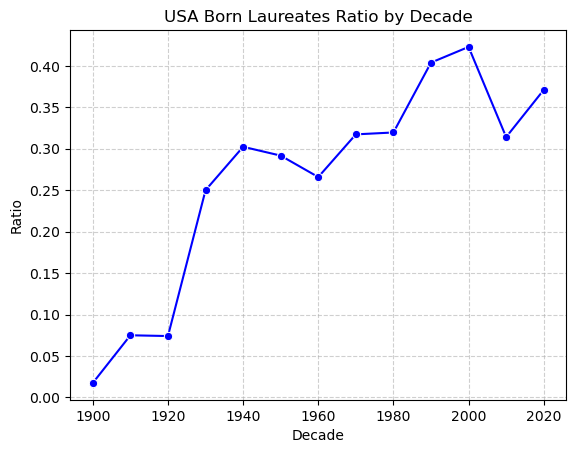

{2020: 'Literature'}


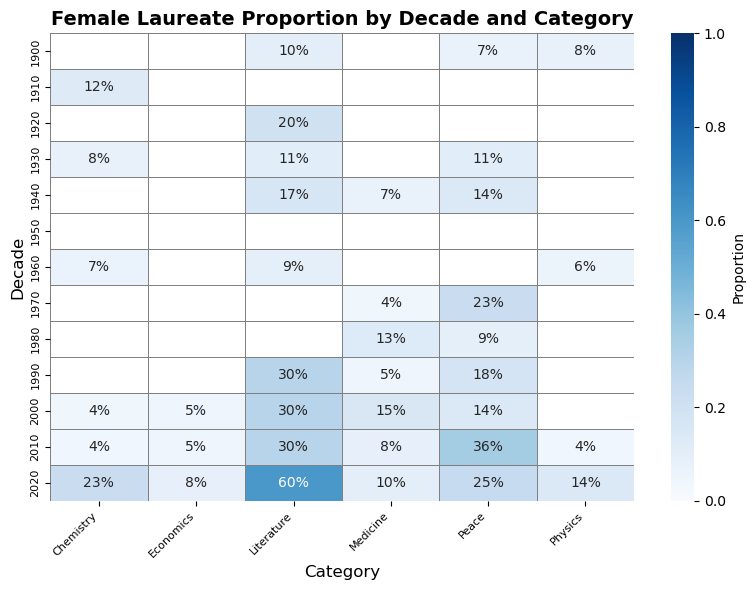

Marie Curie, née Sklodowska: Physics
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'John Bardeen', 'Linus Carl Pauling', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

# Load the dataset
nobel_df = pd.read_csv("data/nobel.csv")
nobel_df.info()
# print index
print(nobel_df.index)

# Extract the top value from sex column
top_gender = nobel_df['sex'].value_counts().idxmax()
print(top_gender)

# Extract the top value from birth_country column
top_country = nobel_df['birth_country'].value_counts().idxmax()
print(top_country)

# Add column for USA born laureates
# nobel_df['is_usa_born'] = nobel_df['birth_country'] == "United States of America"
# Add a decade column
nobel_df['decade'] = nobel_df['year'] // 10 * 10
# Find decade with highest ratio of USA born laureates to total laureates
usa_born_ratio = (
    nobel_df[nobel_df['birth_country'] == "United States of America"]
    .groupby(['decade']).size()
    .div(nobel_df.groupby(['decade']).size())
)
max_decade_usa = usa_born_ratio.idxmax()
print(str(max_decade_usa) + ": " + str(usa_born_ratio[max_decade_usa]))
# Create a relational line plot
sns.lineplot(data=usa_born_ratio, marker='o', linestyle='-', color='blue')
plt.title("USA Born Laureates Ratio by Decade")
plt.xlabel("Decade")
plt.ylabel("Ratio")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Find ratio of female laureates to total laureates per decade and category
# nobel_df['is_female'] = nobel_df['sex'] == "Female"
female_laureate_ratio = (
    nobel_df[nobel_df['sex'] == 'Female']
    .groupby(['decade', 'category']).size()
    .div(nobel_df.groupby(['decade', 'category']).size())
    .reset_index(name='female_ratio')
    .sort_values(
        by=['female_ratio', 'decade', 'category'],
        ascending=[False, True, True]
    )
)
# Assign a dict with top decade and category
max_row = female_laureate_ratio.iloc[0]
max_female_dict = {int(max_row['decade']): max_row['category']}
print(max_female_dict)
# Create a relational plot
pivot = female_laureate_ratio.pivot(index='decade', columns='category', values='female_ratio')
# Create a heatmap to visualize the female laureate proportion by decade and category
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot, 
    vmin=0, vmax=1, 
    cmap="Blues", 
    annot=True, 
    fmt=".0%", 
    linewidths=0.5, 
    linecolor='gray', 
    cbar_kws={'label': 'Proportion'}
)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Decade", fontsize=12)
plt.title("Female Laureate Proportion by Decade and Category", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Find the first woman to receive a Nobel Prize and in which category
first_woman = (
    nobel_df[nobel_df['sex'] == "Female"]
    .sort_values(by='year', ascending=True)
    .iloc[0]
)
# Set values
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']
print(first_woman_name + ": " + first_woman_category)

# Count the number of times one laureate has received multiple Nobel Prizes
multiple_laureates = (
    nobel_df
    .groupby('full_name', as_index=False)
    .size()
    .rename(columns={'size': 'no_of_wins'})
    .sort_values('no_of_wins', ascending=False)
    .query('no_of_wins > 1')
)
# Save the multiple winners list
repeat_list = multiple_laureates['full_name'].to_list()
print(repeat_list)